In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images, test_images = training_images/255, test_images/255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4964 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3767 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3400 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3159 - accuracy: 0.8836
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8766


In [6]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images, test_images = training_images/255, test_images/255
test_images = test_images.reshape(10000,28,28,1)
training_images = training_images.reshape(60000,28,28,1)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.2.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)         

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels)= mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4523 - accuracy: 0.8352
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3009 - accuracy: 0.8899
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2528 - accuracy: 0.9072
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2209 - accuracy: 0.9177
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2518 - accuracy: 0.9078 1s - loss:
0.907800018787384


# VISUALIZING CONVOLUTIONS

In [11]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

2.2.0
11493376/11490434 [==============================] - 17s 1us/step
Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1581 - accuracy: 0.9528
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0537 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 4/10
  29/1875 [..............................] - ETA: 24s - loss: 0.0187 - accuracy: 0.9957

KeyboardInterrupt: 

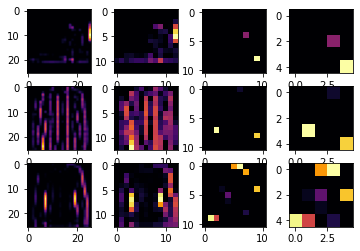

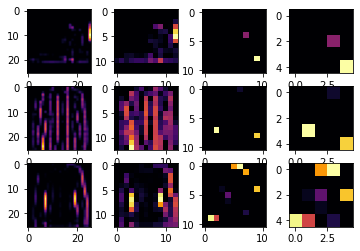

In [18]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)